# Rancher Based Modeling

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt

In [24]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='images/Drought_Monitor.png'></td><td><img src='images/pdi1895.png'></td></tr></table>"))

,


In [4]:
df2 = pd.read_csv('data/counts_precip.csv')
df2.head()

,ID,Location,interval,X,Y,count,precip
0,13,"Americus, GA",2015_09,-84.23,32.07,164.0,99.20
1,13,"Americus, GA",2015_08,-84.23,32.07,420.0,85.98
2,13,"Americus, GA",2015_07,-84.23,32.07,250.0,79.38
3,13,"Americus, GA",2015_06,-84.23,32.07,139.0,55.40
4,13,"Americus, GA",2015_05,-84.23,32.07,154.0,21.69


Below is the original code and charts for the state-wide regression, and next to it is the resulting scatter plot from the second attempt to find correlation by grouping the data into cattle auction regions. The summary tables indicates no correlation, and the scatter charts shows the same. 

In [25]:

display(HTML("<table><tr><td><img src='images/Plots/r screen capture.jpg'></td><td><img src='images/Precip_Counts.png'></td></tr></table>"))

,


 It was possible that the drought signal is not reflected in head counts, so I attempted the same with cattle weights. Below is the process by which I regrouped the data by weights. Unfortunately, no correlation was found here either, as evidenced by the  scatter plot following the data preparation. 

In [10]:
cows = pd.read_csv('data/georgia_cows.csv')
cows.head()

,Unnamed: 0,average_price,class_description,grade_description,head_count,location,price_high,price_low,report_date,selling_basis_description,weight_range_high,weight_range_low,weighted_average,x,y,Unnamed: 15
0,0,262.00,Feeder_Bulls,Medium_and_Large_1,1.0,"Americus, GA",262.0,262.0,4/10/2014,Live,300,250,280.0,-84.232688,32.072386,NaN
1,1,270.00,Feeder_Bulls,Medium_and_Large_1,1.0,"Americus, GA",270.0,270.0,5/1/2014,Live,300,250,295.0,-84.232688,32.072386,NaN
2,2,265.00,Feeder_Bulls,Medium_and_Large_1,1.0,"Americus, GA",265.0,265.0,5/8/2014,Live,300,250,265.0,-84.232688,32.072386,NaN
3,3,304.31,Feeder_Bulls,Medium_and_Large_1,4.0,"Americus, GA",307.0,300.0,6/12/2014,Live,300,250,272.5,-84.232688,32.072386,NaN
4,4,342.50,Feeder_Bulls,Medium_and_Large_1,2.0,"Americus, GA",345.0,340.0,6/19/2014,Live,300,250,265.0,-84.232688,32.072386,NaN


In [11]:
cows['report_date']=pd.to_datetime(cows.report_date)
cows['day'] = cows.report_date.dt.day
cows['month'] = cows.report_date.dt.month
cows['year'] = cows.report_date.dt.year
cows.groupby(['location','year','month']).weighted_average.mean().head()

location      year  month
Americus, GA  2002  8        470.387778
                    9        474.521176
                    10       464.290000
              2004  1        460.609063
                    2        397.605769
Name: weighted_average, dtype: float64

In [12]:
cows.groupby(['location','year','month']).weight_range_high.mean().head()

location      year  month
Americus, GA  2002  8        497.222222
                    9        500.000000
                    10       490.000000
              2004  1        489.062500
                    2        423.076923
Name: weight_range_high, dtype: float64

 With time running out, I forget how to concatenate these values into a new column by intervals. I am going to excel real quick to organize this, I'll be right back.

In [13]:
monthly_weights = cows.groupby(['location','year','month']).weight_range_high.mean()
pd.DataFrame(data=monthly_weights).to_csv('data/monthly_weights2.csv')
cows.to_csv('data/monthly_weights.csv')

In [14]:
df = pd.read_csv('data/weights_precip.csv')
Ashburn = df[df.location=='Ashburn, GA']
Athens = df[df.location=='Athens, GA']
Blackshear = df[df.location=='Blackshear, GA']
Blakely = df[df.location=='Blakely, GA']
#Americus.to_csv('data/americus.csv')

In [15]:
df.head()

,Auction ID,location,Interval,X,Y,precip,weights
0,13,"Americus, GA",2004_01,-84.23,32.07,72.44,489.062500
1,11,"Ashburn, GA",2004_01,-83.65,31.71,99.30,459.615385
2,2,"Athens, GA",2004_01,-83.38,33.96,101.15,487.500000
3,18,"Blackshear, GA",2004_01,-82.24,31.31,85.17,467.500000
4,15,"Blakely, GA",2004_01,-84.93,31.38,91.46,489.473684


In [16]:
plt.scatter(df['precip'], df['weights'])
plt.show()

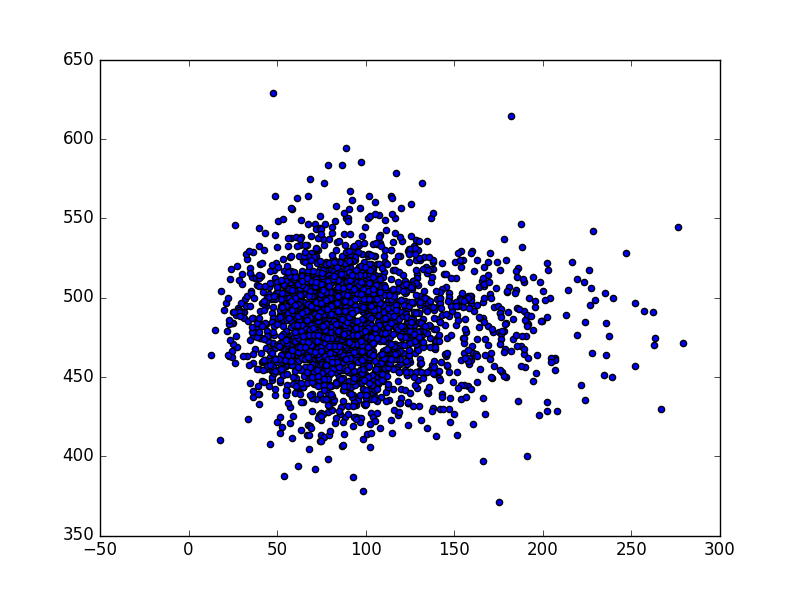

In [18]:
Image('images/weight_precip.png', height = 400, width = 400)

In [ ]:
Lacking any actual stocking response response to drought, the following code blocks were used in the ABM for insured 
and uninsured agents.

def ifUninsured():
  if self.stock <= (1.5 * self.initial_stock):  
    if self.precip >= (.85 * self.PrecipAv) and self.stock <= (1.15 * self.PrecipAv):
      self.stock = self.stock
    elif self.precip > (1.15 * self.PrecipAv):
      self.stock = 1.15 * self.stock 
    else: 
      self.stock = self.stock - (.08 * self.stock)
  else:
    if self.precip < (.85 * self.PrecipAv):
      self.stock = self.stock - (.15 * self.stock)  

def ifInsured():
  if self.stock <= (1.5 * self.initial_stock):  
    if self.precip >= (.85 * self.PrecipAv) and self.stock <= (1.15 * self.PrecipAv):
      self.stock = self.stock
    elif self.precip > (1.15 * self.PrecipAv):
      self.stock = 1.25 * self.stock 
    else: 
      self.stock = self.stock - (.02 * self.stock)
  else:
    if self.precip < (.85 * self.PrecipAv):
      self.stock = self.stock - (.10 * self.stock)  

In [2]:
df = pd.read_csv('data/ranchers.csv')
df.head()

,FID,location,F1,F2,F3,F4,F5,F6,F7,F8,...,F124,F125,F126,F127,F128,F129,F130,RANCHER_ID,COLOR,PrecipAv
0,0,"Eastanollee, GA",86.71,225.99,262.60,99.63,104.90,61.62,125.59,166.01,...,106.23,111.01,128.26,186.59,99.81,75.34,92.03,0,GREEN,101.82
1,1,"Carrollton, GA",119.67,105.11,79.16,79.28,98.13,53.33,75.03,72.35,...,94.85,98.72,48.23,79.42,108.02,109.23,120.05,1,GREEN,96.12
2,2,"Greensboro, GA",105.75,116.64,83.71,80.62,87.32,135.00,90.02,36.66,...,82.33,104.19,89.30,75.69,71.81,97.57,135.48,2,GREEN,94.20
3,3,"Jackson, GA",125.05,59.53,96.11,73.40,127.73,153.99,160.75,138.75,...,74.24,76.16,50.72,69.00,92.11,81.41,125.61,3,GREEN,95.07
4,4,"Swainsboro, GA",106.83,79.37,88.31,157.49,135.15,33.33,97.03,73.49,...,112.63,78.05,90.51,55.28,52.82,39.79,48.65,4,GREEN,94.53


In [ ]:
<?xml version="1.0"?>

<!-- Evolver Model Specification File -->
<RePastEvolver:EvolverModelSpec xmlns:RePastEvolver="http://src.uchicago.edu/simbuilder/">
<RePastEvolver:EvolverProject  ProjectDirectory="C:\Repast 3\Agent Analyst\output" PackageName="default_package" ProjectName="Environment" ClassPath="" consoleErr="true" consoleOut="true" >
<Description>
<![CDATA[
The, hopefully, final version of the insurance adoption ABM.
I am hoping that adding the code from the other will fix whatever problem it has.
]]>
</Description>
<RePastEvolver:EvolverModel  ModelName="GISModel" DisplayName="Insurance Adoption Model" Class="class uchicago.src.simbuilder.beans.gis.DefaultGISModelProducer" gisPackage="ArcGIS" >
  <RePastEvolver:action name="initAgents" sigReadOnly="true" retType="void" imports="" paramNames="">
<![CDATA[
def initAgents():
  self.datasource = "C:/Users/Travis/Documents/ArcGIS 10.3/Projects/Ranch Response/Shape_files/ranchers.shp"
  self.setupRanchers()
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="updateDisplay" sigReadOnly="true" retType="void" imports="" paramNames="">
<![CDATA[
def updateDisplay():
  self.updateGISDisplay()
  self.theTimeStep()
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="writeAgents" sigReadOnly="true" retType="void" imports="" paramNames="">
<![CDATA[
def writeAgents():
  self.writeAgents(self.ranchers,self.datasource)
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="setupRanchers" sigReadOnly="false" retType="void" imports="java.io.BufferedReader java.io.FileReader java.util.StringTokenizer" paramNames="">
<![CDATA[
def setupRanchers():
  ranchersByID = HashMap()
  for rancher as Rancher in self.ranchers:
    ranchersByID.put(rancher.getRANCHER_ID(),rancher)
    rancher.setCOLOR("BROWN")
    stock = Random.uniform.nextDoubleFromTo(5000, 10000)
    rancher.setStrike(Random.uniform.nextDoubleFromTo(self.StrikeLowerRange,self.StrikeUpperRange))
    rancher.setNeighborSensitivity(Random.uniform.nextDoubleFromTo(self.SensitivityLowerRange,self.SensitivityUpperRange))
    rancher.setStock(stock)
    rancher.setInitial_stock(stock)
    rancher.setMyNeighbors(ArrayList())  
  reader = BufferedReader(FileReader("C:/Users/Travis/Documents/GitHub/STA-Final/data/neighbors.txt"))
  line = reader.readLine()
  while (line):
    tokenizer = StringTokenizer(line, ":")
    if (tokenizer.hasMoreTokens()):
      rancherID = tokenizer.nextToken().trim()
      rancher = (Rancher)ranchersByID.get(rancherID)
      nghs = rancher.getMyNeighbors()
      nghIDs = tokenizer.nextToken().trim()
      nghTok = StringTokenizer(nghIDs, ",")
      while (nghTok.hasMoreTokens()):
        ngh = ranchersByID.get(nghTok.nextToken()) # from the HashMap above
        nghs.add(ngh)
    line = reader.readLine()
  reader.close()
  
  self.printNeighbors()
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="theTimeStep" sigReadOnly="false" retType="void" imports="" paramNames="">
<![CDATA[
def theTimeStep():
  self.TimeStep = self.TimeStep + 1
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="printNeighbors" sigReadOnly="false" retType="void" imports="" paramNames="">
<![CDATA[
def printNeighbors():
  i = 0
  for ranch as Rancher in self.ranchers:
    id = ranch.getRANCHER_ID()
    count = ranch.getMyNeighbors().size()
    print "Ranch", id,": Average Precipitation =",ranch.PrecipAv,"mm,  Initial stock =", ranch.initial_stock
    i = i + 1
    if i > 21:
      break
]]>
</RePastEvolver:action>


<RePastEvolver:parameter name="datasource" type="java.lang.String" defaultValue="" probe="false" accessible="false" />
<RePastEvolver:parameter name="TimeStep" type="int" defaultValue="1" probe="false" accessible="true" />
<RePastEvolver:parameter name="StrikeLowerRange" type="double" defaultValue=".7" probe="true" accessible="true" />
<RePastEvolver:parameter name="StrikeUpperRange" type="double" defaultValue=".9" probe="true" accessible="true" />
<RePastEvolver:parameter name="SensitivityLowerRange" type="double" defaultValue=".25" probe="true" accessible="true" />
<RePastEvolver:parameter name="SensitivityUpperRange" type="double" defaultValue=".65" probe="true" accessible="true" />


<RePastEvolver:schedule order="0 2 3 4" />
<RePastEvolver:schedule order="1"/>
<RePastEvolver:schedule_item action="writeAgents" tick="1.0" type="1" last="false" target="GISModel" id="2"/>
<RePastEvolver:schedule_item action="updateDisplay" tick="1.0" type="1" last="false" target="GISModel" id="3"/>

<RePastEvolver:EvolverBean type="Compileable" class="class uchicago.src.simbuilder.beans.gis.VectorAgentProducer" name="Rancher" groupName="ranchers">
<VectorDataSource shapefile="C:\Users\Travis\Documents\ArcGIS 10.3\Projects\Ranch Response\Shape_files\ranchers.shp" displayField="COLOR" gisPackage="ArcGIS">
<VectorDataSourceDisplayValue field="default value" color="-65536" isDefault="true" thickness="-1" />
</VectorDataSource>

  <RePastEvolver:action name="step" sigReadOnly="true" retType="void" imports="" paramNames="">
<![CDATA[
def step():
  self.setInsurance()
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="setInsurance" sigReadOnly="false" retType="void" imports="" paramNames="">
<![CDATA[
def setInsurance():
  self.adjustPrecip()
  
  if self.insured == false:
    self.ifUninsured()
  else:
    self.ifInsured()
    
  print "Rancher", self.RANCHER_ID,": Insured =", self.insured,"   precipitation =",self.precip,"mm,   missed payouts = ", self.missed_count, "times. Stock =", self.stock
  # print "Rancher", self.RANCHER_ID,"Month:",self.model.TimeStep,": Coulda =",self.coulda_count,"Woulda_count =", self.woulda_count,"Shoulda_count =", self.shoulda_count, "Stock =", self.stock
  # print "Rancher", self.RANCHER_ID,"Month:",self.model.TimeStep,": Decision Weight =",self.maybe_should
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="ifUninsured" sigReadOnly="false" retType="void" imports="" paramNames="">
<![CDATA[
def ifUninsured():

  count = 0
  totalNeighbors =  self.getMyNeighbors().size() 

  if self.stock <= (1.5 * self.initial_stock):  
    if self.precip >= (.85 * self.PrecipAv) and self.stock <= (1.15 * self.PrecipAv):
      self.stock = self.stock
    elif self.precip > (1.15 * self.PrecipAv):
      self.stock = 1.15 * self.stock 
    else: 
      self.stock = self.stock - (.08 * self.stock)
  else:
    if self.precip < (.85 * self.PrecipAv):
      self.stock = self.stock - (.15 * self.stock)  
  
  if self.stock < (.85 * self.initial_stock):
    self.shoulda_count = self.shoulda_count + Random.uniform.nextDoubleFromTo(.85, 1.15)

  if self.precip < self.PrecipAv * self.strike:
    self.setCOLOR("GREEN")
    self.missed_count = self.missed_count + 1
    if self.missed_count / self.model.TimeStep > .3:
      self.coulda_count = self.coulda_count + Random.uniform.nextDoubleFromTo(.85, 1.15)
      print "Rancher", self.RANCHER_ID,"'s woulda count =", self.woulda_count
  else:
    self.setCOLOR("BROWN")
    
  for nghRanch as Rancher in self.getMyNeighbors():
    if nghRanch.insured == true:
      count = count + 1
      if count / totalNeighbors > self.neighborSensitivity:
        self.woulda_count = self.woulda_count + Random.uniform.nextDoubleFromTo(.85, 1.15)
        print "Rancher", self.RANCHER_ID,"insured neighbor count=",count,"woulda count =", self.woulda_count 

  self.maybe_should = (self.coulda_count +  self.woulda_count + self.shoulda_count)/ self.model.TimeStep  
  
  if self.model.TimeStep > 5:
    if self.stock < 2000:
      self.setInsured(true)
      self.setCOLOR("RED")
  
    if (self.maybe_should > self.thats_it):
      self.setInsured(true)
      self.setCOLOR("RED")
    
  print "Rancher", self.RANCHER_ID,"Month:",self.model.TimeStep,": Decision Weight =",self.maybe_should
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="ifInsured" sigReadOnly="false" retType="void" imports="" paramNames="">
<![CDATA[
def ifInsured():
  
  if self.stock <= (1.5 * self.initial_stock):  
    if self.precip >= (.85 * self.PrecipAv) and self.stock <= (1.15 * self.PrecipAv):
      self.stock = self.stock
    elif self.precip > (1.15 * self.PrecipAv):
      self.stock = 1.25 * self.stock 
    else: 
      self.stock = self.stock - (.02 * self.stock)
  else:
    if self.precip < (.85 * self.PrecipAv):
      self.stock = self.stock - (.10 * self.stock)  
      
  if self.precip < self.PrecipAv * self.strike:
    self.setCOLOR("ORANGE")
  else:
    self.setCOLOR("RED")
]]>
</RePastEvolver:action>

  <RePastEvolver:action name="adjustPrecip" sigReadOnly="false" retType="void" imports="" paramNames="">
<![CDATA[
def adjustPrecip():
  if (self.model.TimeStep == 1):
    self.precip = self.F1
  elif (self.model.TimeStep == 2):
    self.precip = self.F2
  elif (self.model.TimeStep == 3):
    self.precip = self.F3
  elif (self.model.TimeStep == 4):
    self.precip = self.F4
  elif (self.model.TimeStep == 5):
    self.precip = self.F5
  elif (self.model.TimeStep == 6):
    self.precip = self.F6
  elif (self.model.TimeStep == 7):
    self.precip = self.F7  
  elif (self.model.TimeStep == 8):
    self.precip = self.F8  
  elif (self.model.TimeStep == 9):
    self.precip = self.F9   
  elif (self.model.TimeStep == 10):
    self.precip = self.F10
  elif (self.model.TimeStep == 11):
    self.precip = self.F11
  elif (self.model.TimeStep == 12):
    self.precip = self.F12
  elif (self.model.TimeStep == 13):
    self.precip = self.F13
  elif (self.model.TimeStep == 14):
    self.precip = self.F14
  elif (self.model.TimeStep == 15):
    self.precip = self.F15
  elif (self.model.TimeStep == 16):
    self.precip = self.F16
  elif (self.model.TimeStep == 17):
    self.precip = self.F17  
  elif (self.model.TimeStep == 18):
    self.precip = self.F18  
  elif (self.model.TimeStep == 19):
    self.precip = self.F19   
  elif (self.model.TimeStep == 20):
    self.precip = self.F1
  elif (self.model.TimeStep == 21):
    self.precip = self.F21  
  elif (self.model.TimeStep == 22):
    self.precip = self.F22
  elif (self.model.TimeStep == 23):
    self.precip = self.F23
  elif (self.model.TimeStep == 24):
    self.precip = self.F24
  elif (self.model.TimeStep == 25):
    self.precip = self.F25
  elif (self.model.TimeStep == 26):
    self.precip = self.F26
  elif (self.model.TimeStep == 27):
    self.precip = self.F27  
  elif (self.model.TimeStep == 28):
    self.precip = self.F28  
  elif (self.model.TimeStep == 29):
    self.precip = self.F29
  elif (self.model.TimeStep == 30):
    self.precip = self.F30 
  elif (self.model.TimeStep == 31):
    self.precip = self.F31
  elif (self.model.TimeStep == 32):
    self.precip = self.F32  
  elif (self.model.TimeStep == 33):
    self.precip = self.F33
  elif (self.model.TimeStep == 34):
    self.precip = self.F34  
  elif (self.model.TimeStep == 35):
    self.precip = self.F35
  elif (self.model.TimeStep == 36):
    self.precip = self.F36  
  elif (self.model.TimeStep == 37):
    self.precip = self.F37
  elif (self.model.TimeStep == 38):
    self.precip = self.F38     
  elif (self.model.TimeStep == 39):
    self.precip = self.F39
  elif (self.model.TimeStep == 40):
    self.precip = self.F40
  elif (self.model.TimeStep == 41):
    self.precip = self.F41
  elif (self.model.TimeStep == 42):
    self.precip = self.F42
  elif (self.model.TimeStep == 43):
    self.precip = self.F43
  elif (self.model.TimeStep == 44):
    self.precip = self.F44
  elif (self.model.TimeStep == 45):
    self.precip = self.F45
  elif (self.model.TimeStep == 46):
    self.precip = self.F46
  elif (self.model.TimeStep == 47):
    self.precip = self.F47  
  elif (self.model.TimeStep == 48):
    self.precip = self.F48  
  elif (self.model.TimeStep == 49):
    self.precip = self.F49   
  elif (self.model.TimeStep == 50):
    self.precip = self.F50      
  elif (self.model.TimeStep == 51):
    self.precip = self.F51
  elif (self.model.TimeStep == 52):
    self.precip = self.F52
  elif (self.model.TimeStep == 53):
    self.precip = self.F53
  elif (self.model.TimeStep == 54):
    self.precip = self.F54
  elif (self.model.TimeStep == 55):
    self.precip = self.F55
  elif (self.model.TimeStep == 56):
    self.precip = self.F56
  elif (self.model.TimeStep == 57):
    self.precip = self.F57  
  elif (self.model.TimeStep == 58):
    self.precip = self.F58  
  elif (self.model.TimeStep == 59):
    self.precip = self.F59   
  elif (self.model.TimeStep == 60):
    self.precip = self.F60  
  elif (self.model.TimeStep == 61):
    self.precip = self.F61
  elif (self.model.TimeStep == 62):
    self.precip = self.F62
  elif (self.model.TimeStep == 63):
    self.precip = self.F63
  elif (self.model.TimeStep == 64):
    self.precip = self.F64
  elif (self.model.TimeStep == 65):
    self.precip = self.F65
  elif (self.model.TimeStep == 66):
    self.precip = self.F66
  elif (self.model.TimeStep == 67):
    self.precip = self.F67  
  elif (self.model.TimeStep == 68):
    self.precip = self.F68  
  elif (self.model.TimeStep == 69):
    self.precip = self.F69   
  elif (self.model.TimeStep == 70):
    self.precip = self.F70 
  elif (self.model.TimeStep == 71):
    self.precip = self.F71
  elif (self.model.TimeStep == 72):
    self.precip = self.F72
  elif (self.model.TimeStep == 73):
    self.precip = self.F73
  elif (self.model.TimeStep == 74):
    self.precip = self.F74
  elif (self.model.TimeStep == 75):
    self.precip = self.F75
  elif (self.model.TimeStep == 76):
    self.precip = self.F76
  elif (self.model.TimeStep == 77):
    self.precip = self.F77  
  elif (self.model.TimeStep == 78):
    self.precip = self.F78  
  elif (self.model.TimeStep == 79):
    self.precip = self.F79   
  elif (self.model.TimeStep == 80):
    self.precip = self.F80  
  elif (self.model.TimeStep == 81):
    self.precip = self.F81
  elif (self.model.TimeStep == 82):
    self.precip = self.F82
  elif (self.model.TimeStep == 83):
    self.precip = self.F83
  elif (self.model.TimeStep == 84):
    self.precip = self.F84
  elif (self.model.TimeStep == 85):
    self.precip = self.F85
  elif (self.model.TimeStep == 86):
    self.precip = self.F86
  elif (self.model.TimeStep == 87):
    self.precip = self.F87  
  elif (self.model.TimeStep == 88):
    self.precip = self.F88  
  elif (self.model.TimeStep == 89):
    self.precip = self.F89   
  elif (self.model.TimeStep == 90):
    self.precip = self.F90                 
  elif (self.model.TimeStep == 91):
    self.precip = self.F91
  elif (self.model.TimeStep == 92):
    self.precip = self.F92
  elif (self.model.TimeStep == 93):
    self.precip = self.F93
  elif (self.model.TimeStep == 94):
    self.precip = self.F94
  elif (self.model.TimeStep == 95):
    self.precip = self.F95
  elif (self.model.TimeStep == 96):
    self.precip = self.F96
  elif (self.model.TimeStep == 97):
    self.precip = self.F97  
  elif (self.model.TimeStep == 98):
    self.precip = self.F98  
  elif (self.model.TimeStep == 99):
    self.precip = self.F99   
  elif (self.model.TimeStep == 100):
    self.precip = self.F100  
  elif (self.model.TimeStep == 101):
    self.precip = self.F101
  elif (self.model.TimeStep == 102):
    self.precip = self.F102
  elif (self.model.TimeStep == 103):
    self.precip = self.F103
  elif (self.model.TimeStep == 104):
    self.precip = self.F104
  elif (self.model.TimeStep == 105):
    self.precip = self.F105
  elif (self.model.TimeStep == 106):
    self.precip = self.F106
  elif (self.model.TimeStep == 107):
    self.precip = self.F107  
  elif (self.model.TimeStep == 108):
    self.precip = self.F108  
  elif (self.model.TimeStep == 109):
    self.precip = self.F109   
  elif (self.model.TimeStep == 110):
    self.precip = self.F110  
  elif (self.model.TimeStep == 111):
    self.precip = self.F111
  elif (self.model.TimeStep == 112):
    self.precip = self.F112
  elif (self.model.TimeStep == 113):
    self.precip = self.F113
  elif (self.model.TimeStep == 114):
    self.precip = self.F114
  elif (self.model.TimeStep == 115):
    self.precip = self.F115
  elif (self.model.TimeStep == 116):
    self.precip = self.F116
  elif (self.model.TimeStep == 117):
    self.precip = self.F117  
  elif (self.model.TimeStep == 118):
    self.precip = self.F118  
  elif (self.model.TimeStep == 119):
    self.precip = self.F119
  elif (self.model.TimeStep == 120):
    self.precip = self.F120  
  elif (self.model.TimeStep == 121):
    self.precip = self.F121
  elif (self.model.TimeStep == 122):
    self.precip = self.F122
  elif (self.model.TimeStep == 123):
    self.precip = self.F123
  elif (self.model.TimeStep == 124):
    self.precip = self.F124
  elif (self.model.TimeStep == 125):
    self.precip = self.F125
  elif (self.model.TimeStep == 126):
    self.precip = self.F126
  elif (self.model.TimeStep == 127):
    self.precip = self.F127  
  elif (self.model.TimeStep == 128):
    self.precip = self.F128  
  elif (self.model.TimeStep == 129):
    self.precip = self.F129
  elif (self.model.TimeStep == 130):
    self.precip = self.F130                                                            
  else:
    self.precip = 0.0
]]>
</RePastEvolver:action>


<RePastEvolver:parameter name="precip" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="stock" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="myNeighbors" type="java.util.ArrayList" defaultValue="" probe="false" accessible="true" />
<RePastEvolver:parameter name="insured" type="boolean" defaultValue="false" probe="false" accessible="true" />
<RePastEvolver:parameter name="maybe_should" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="missed_count" type="int" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="coulda_count" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="shoulda_count" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="woulda_count" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="initial_stock" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="thats_it" type="double" defaultValue="1" probe="false" accessible="true" />
<RePastEvolver:parameter name="strike" type="double" defaultValue="0" probe="false" accessible="true" />
<RePastEvolver:parameter name="neighborSensitivity" type="double" defaultValue="0" probe="false" accessible="true" />

<RePastEvolver:schedule_item action="step" tick="1.0" type="1" last="false" target="for all Rancher" id="0"/>
<RePastEvolver:schedule_item action="step" tick="130.0" type="5" last="false" target="for all Rancher" id="1"/>

</RePastEvolver:EvolverBean>

<RePastEvolver:EvolverBean type="Component" class="uchicago.src.simbuilder.beans.SequenceGraph" name="Precipitation" title="Sequence Graph" xAxisTitle="Time"
 yAxisTitle="Average Monthly Precipitation" xAxisStart="100.0" yAxisStart="15.0">


<RePastEvolver:file_property doWrite="false" fileName="" />
<RePastEvolver:seqAction name="rain" imports="" retVal="double" paramNames="" color="0 0 255" pointType="7">
<![CDATA[
count = self.ranchers.size()
sum = 0.0

for rancher as Rancher in self.ranchers:
  sum = sum + rancher.precip
return sum / count
]]>
</RePastEvolver:seqAction>
<RePastEvolver:schedule_item action="update" tick="1.0" type="1" last="false" target="Sequence Graph: Precipitation" id="4"/>

</RePastEvolver:EvolverBean>





</RePastEvolver:EvolverModel>
</RePastEvolver:EvolverProject>
</RePastEvolver:EvolverModelSpec>

In [39]:
from IPython.display import HTML

HTML("""
<video width="800" height="800" controls>
  <source src="images/Trial_run1.mp4" type="video/mp4">
</video>
""")

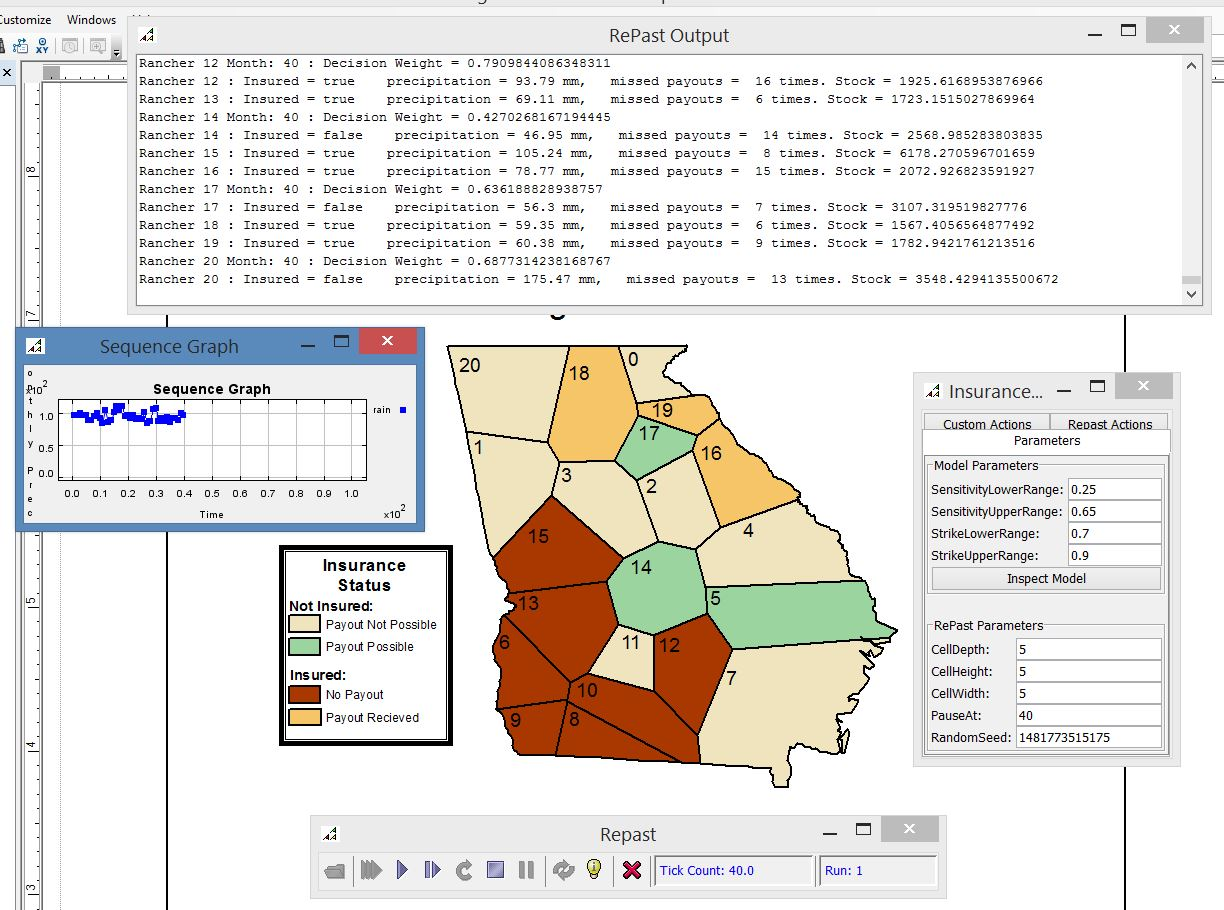

In [55]:
Image('images/Trial_Run2.jpg', height = 800, width = 800)

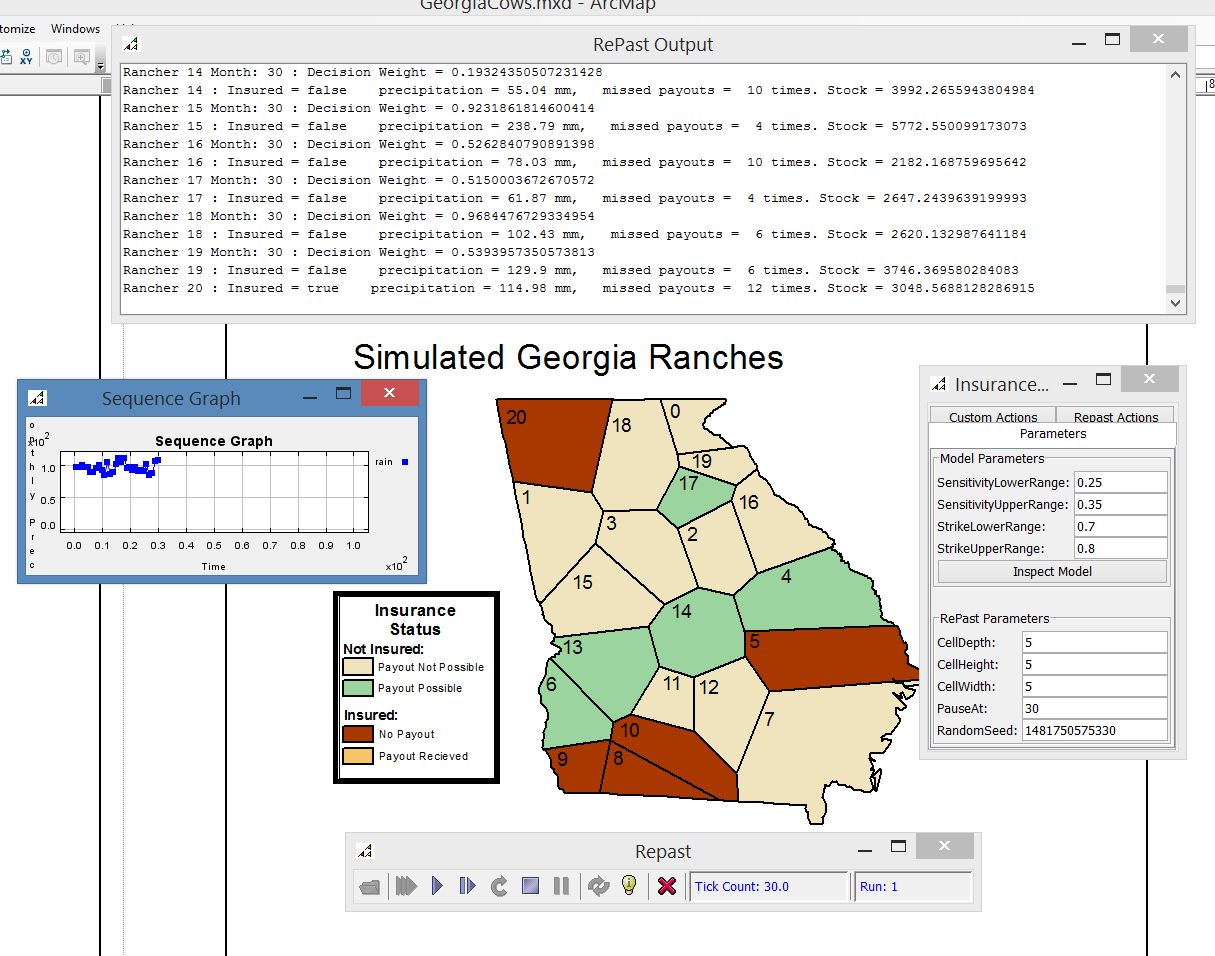

In [54]:
Image('images/Trial_Run3.jpg', height = 800, width = 800)

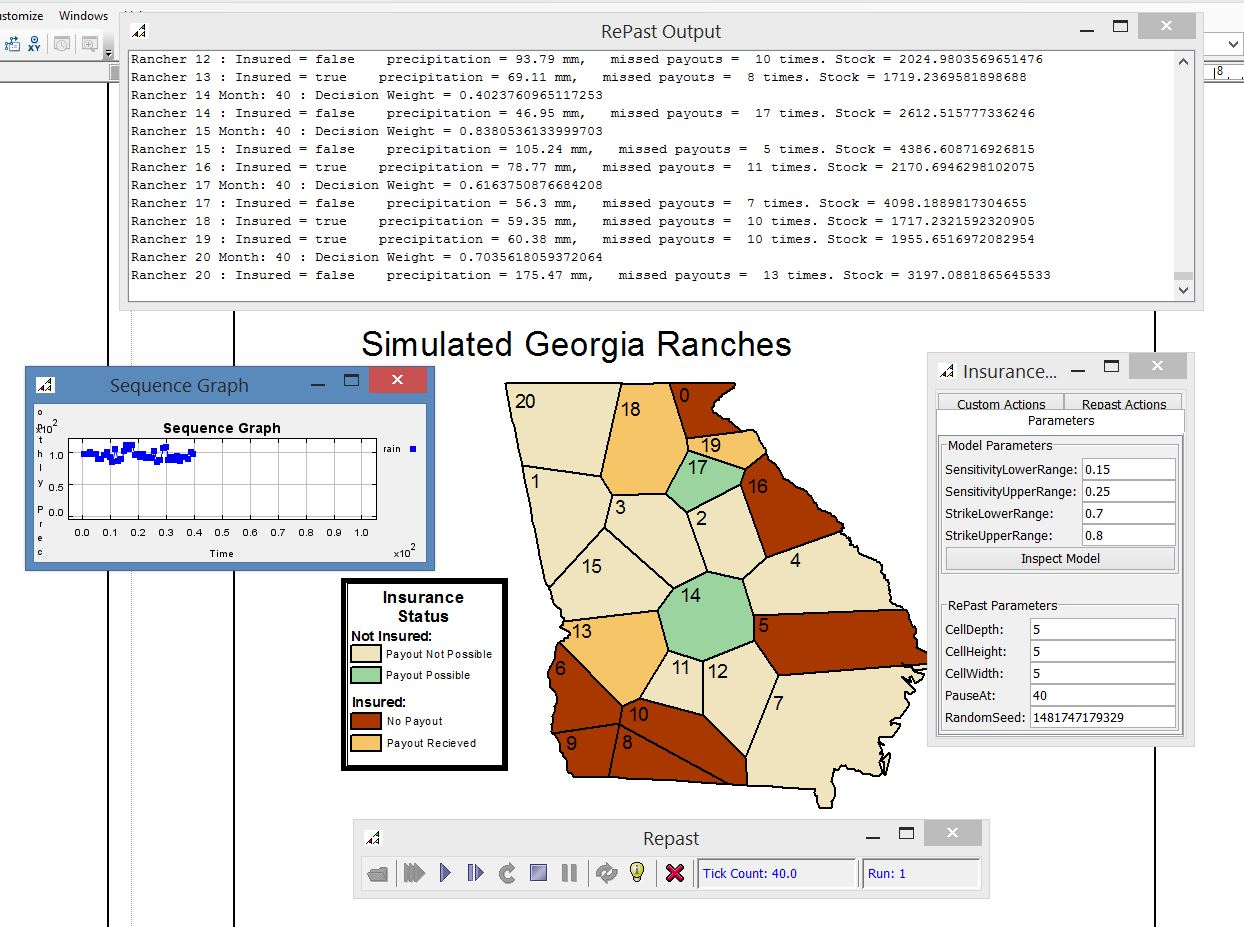

In [47]:
Image('images/Trial_Run4.jpg', height = 800, width = 800)

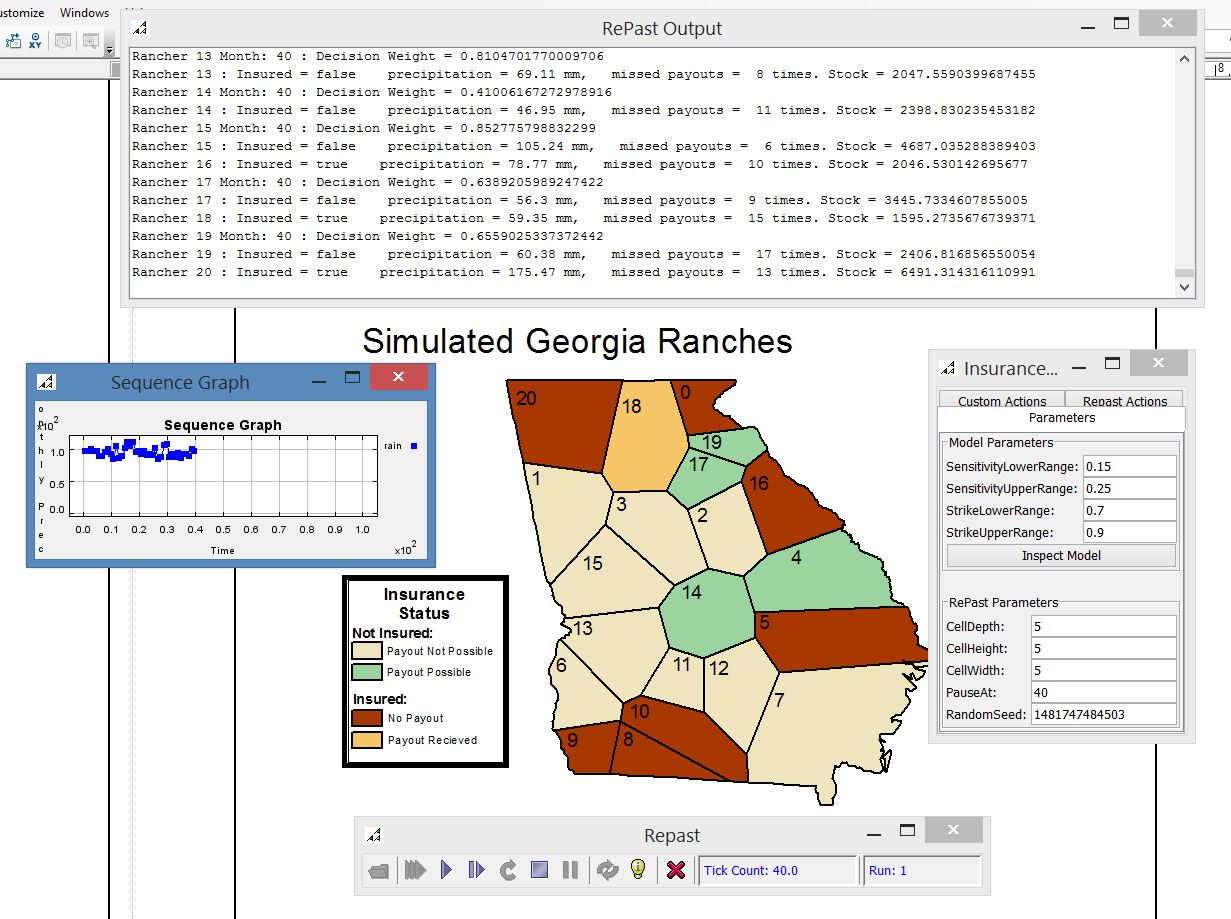

In [49]:
Image('images/Trial_Run5.jpg', height = 800, width = 800)

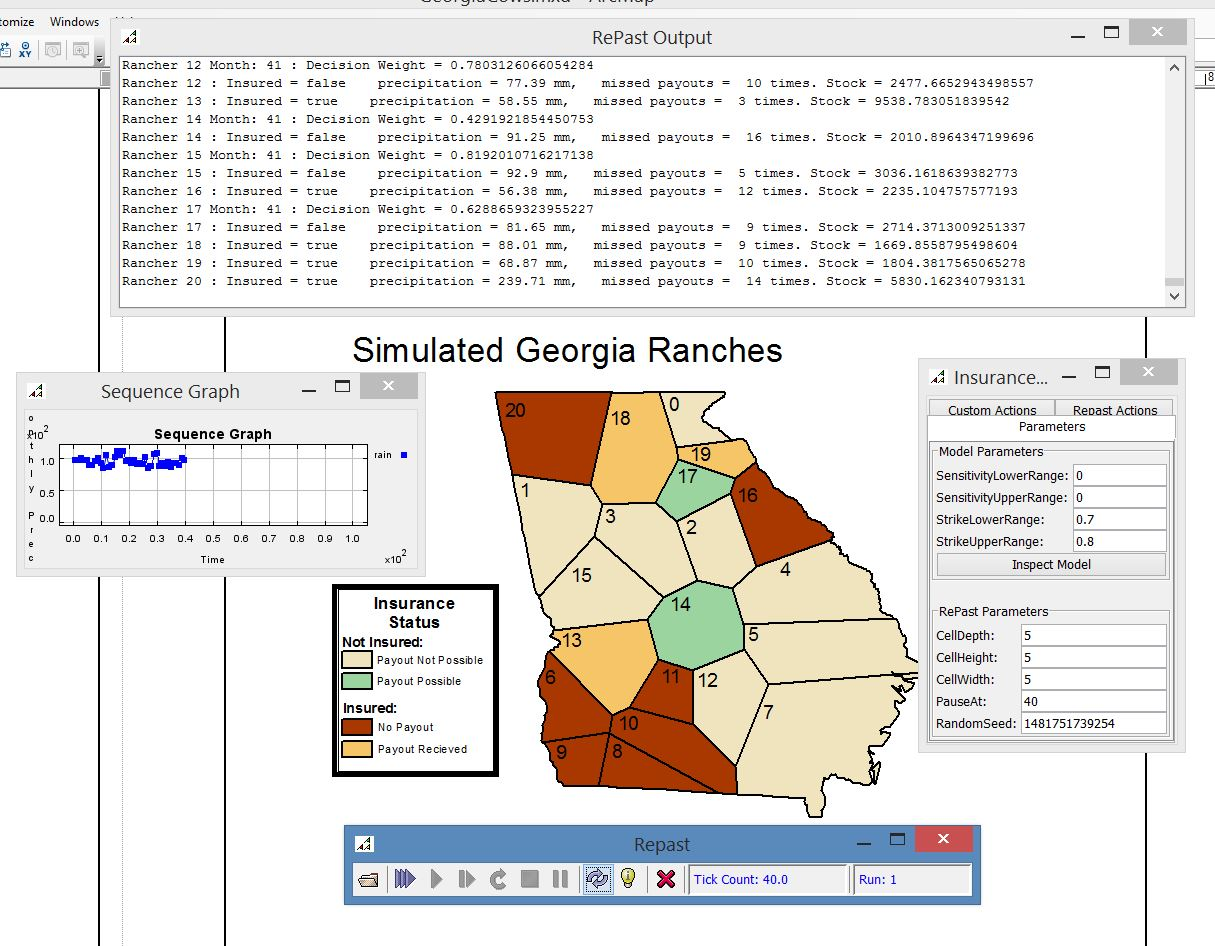

In [51]:
Image('images/Trial_Run6.jpg', height = 800, width = 800)